<a href="https://colab.research.google.com/github/TakashiFujiwara/Machine-learning-application/blob/main/AI_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install flickrapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.4 MB/s 


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [4]:
mkdir "image"

In [6]:
# Flickrで写真を検索して、ダウンロードする
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

# APIキーとシークレットの指定（★以下書き換えてください★）--- (*1)
key = "ca89322dd1e001945f30b5ce93f3c325"
secret = "cf69e65d2f16e8bf"
wait_time = 1 # 待機秒数（1以上を推奨）

# キーワードとディレクトリ名を指定してダウンロード --- (*2)
def main():
    go_download('寿司', 'sushi')
    go_download('サラダ','salad')
    go_download('麻婆豆腐','mabo-tofu')
    
# Flickr APIで写真を検索 --- (*3)
def go_download(keyword, dir):
    # 画像の保存パスを決定
    savedir = "./image/" + dir
    if not os.path.exists(savedir):
        os.mkdir(savedir)
    # APIを使ってダウンロード --- (*4)
    flickr = FlickrAPI(key, secret, format='parsed-json')
    res = flickr.photos.search(
      text = keyword,     # 検索語
      per_page = 200,     # 取得件数
      media = 'photos',   # 写真を検索
      sort = "relevance", # 検索語の関連順に並べる
      safe_search = 1,    # セーフサーチ
      extras = 'url_q, license')
    # 検索結果を確認
    photos = res['photos']
    pprint(photos)
    try:
      # 1枚ずつ画像をダウンロード --- (*5)
      for i, photo in enumerate(photos['photo']):
        url_q = photo['url_q']
        filepath = savedir + '/' + photo['id'] + '.jpg'
        if os.path.exists(filepath): continue
        print(str(i + 1) + ":download=", url_q)
        urlretrieve(url_q, filepath)
        time.sleep(wait_time)
    except:
      import traceback
      traceback.print_exc()

if __name__ == '__main__':
    main()


ストリーミング出力は最後の 5000 行に切り捨てられました。
            'owner': '34603734@N00',
            'secret': '4c1c231c53',
            'server': '3335',
            'title': 'サラダ',
            'url_q': 'https://live.staticflickr.com/3335/3331104214_4c1c231c53_q.jpg',
            'width_q': 150},
           {'farm': 66,
            'height_q': 150,
            'id': '49483178111',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '0',
            'owner': '57637047@N08',
            'secret': '3b21599dde',
            'server': '65535',
            'title': 'サラダ',
            'url_q': 'https://live.staticflickr.com/65535/49483178111_3b21599dde_q.jpg',
            'width_q': 150},
           {'farm': 6,
            'height_q': 150,
            'id': '9227775788',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '5',
            'owner': '9938180@N07',
            'secret': '3b69c3e8fc',
           

In [7]:
pwd

'/content/drive/MyDrive'

In [9]:
cd image

/content/drive/MyDrive/image


In [10]:
cd mabo-tofu

/content/drive/MyDrive/image/mabo-tofu


In [18]:
ls -U1 | wc -l

100


In [24]:
cd ..

/content/drive/MyDrive/image


In [20]:
cd salad

/content/drive/MyDrive/image/salad


In [30]:
ls -U1 | wc -l #これで確認

100


In [25]:
cd sushi

/content/drive/MyDrive/image/sushi


In [4]:
# 画像ファイルを読んでNumpy形式に変換
import numpy as np
from PIL import Image
import os, glob, random

outfile = "image/photos.npz" # 保存ファイル名
max_photo = 100 # 利用する写真の枚数
photo_size = 32 # 画像サイズ
x = [] # 画像データ
y = [] # ラベルデータ

def main():
    # 各画像のフォルダを読む --- (*1)
    glob_files("./image/sushi", 0)
    glob_files("./image/salad", 1)
    glob_files("./image/mabo-tofu", 2)
    # ファイルへ保存 --- (*2)
    np.savez(outfile, x=x, y=y)
    print("保存しました:" + outfile, len(x))

# path以下の画像を読み込む --- (*3)
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    # 各ファイルを処理
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        # 画像ファイルを読む
        img = Image.open(f)
        img = img.convert("RGB") # 色空間をRGBに
        img = img.resize((photo_size, photo_size)) # サイズ変更
        img = np.asarray(img)
        x.append(img)
        y.append(label)

if __name__ == '__main__':
    main()


保存しました:image/photos.npz 300


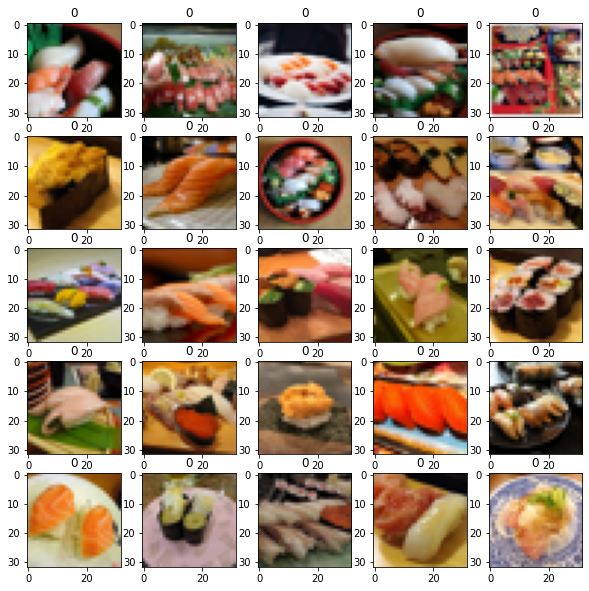

In [6]:
import matplotlib.pyplot as plt
photos=np.load('image/photos.npz')
x=photos['x']
y=photos['y']
idx=0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(y[i+idx])
  plt.imshow(x[i+idx])
plt.show()